In [22]:
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime

In [23]:
start = time()

In [24]:
file_by_days="./data/reduced/days.csv"
file_by_hours="./data/reduced/hours.csv"
file_by_weekdays="./data/reduced/weekdays.csv"
file_by_weather="./data/reduced/weather.csv"

In [25]:
df_by_days = pd.read_csv(file_by_days)
df_by_hours = pd.read_csv(file_by_hours)
df_by_weekdays = pd.read_csv(file_by_weekdays)
df_by_weather = pd.read_csv(file_by_weather)

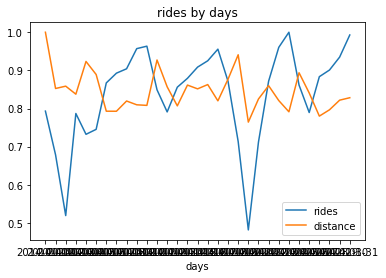

In [26]:
# normilize data
for_plot = df_by_days.copy()
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

fig, ax = plt.subplots()
ax.plot(for_plot["tag_value"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["tag_value"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('days')
ax.set_title("rides by days")
ax.legend() 

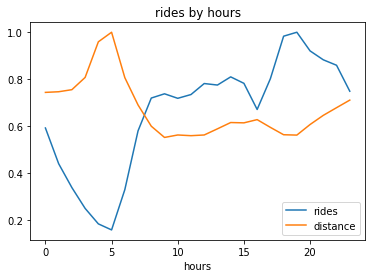

In [27]:
# rides by hour

for_plot = df_by_hours.copy()
for_plot["hr"] = for_plot[["tag_value"]].applymap(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour)
for_plot = for_plot.groupby('hr').agg({'rides_count':'sum', 'trip_distance_mean':'mean'})

# normilize data
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

for_plot = for_plot.reset_index()

fig, ax = plt.subplots()
ax.plot(for_plot["hr"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["hr"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('hours')
ax.set_title("rides by hours")
ax.legend()


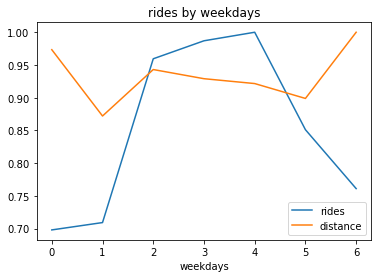

In [28]:
# rides by weekdays

# normilize data
for_plot = df_by_weekdays.copy()
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

fig, ax = plt.subplots()
ax.plot(for_plot["tag_value"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["tag_value"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('weekdays')
ax.set_title("rides by weekdays")
ax.legend() 


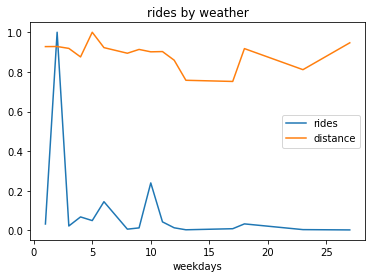

In [29]:
# rides by weather

# normilize data
for_plot = df_by_weather.copy()
for_plot.sort_values(by="tag_value", inplace=True)
max_value = for_plot["rides_count"].max()
for_plot["rides_count"] = for_plot["rides_count"] / max_value
max_value = for_plot["trip_distance_mean"].max()
for_plot["trip_distance_mean"] = for_plot["trip_distance_mean"] / max_value

fig, ax = plt.subplots()
ax.plot(for_plot["tag_value"], for_plot["rides_count"], label='rides')
ax.plot(for_plot["tag_value"], for_plot["trip_distance_mean"], label='distance')
ax.set_xlabel('weekdays')
ax.set_title("rides by weather")
ax.legend() 

In [30]:
print(f"Done in {time()-start} sec")

Done in 1.7622039318084717 sec
